# Parametric Study
A parametric study to explore a portion of the design space availble with existing material sizes

[10, 0.365]
[10.5, 0.75]
[11, 0.5]
[11.5, 0.25]


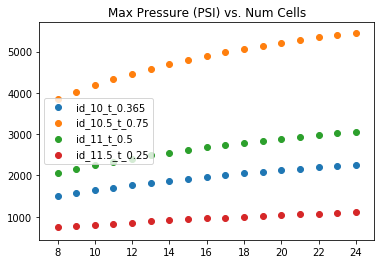

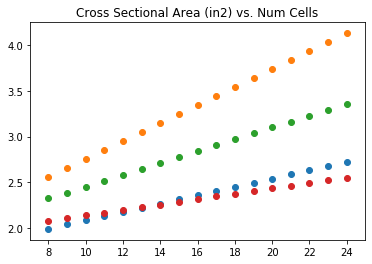

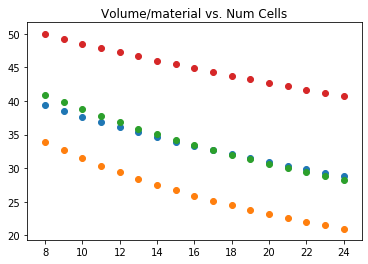

In [52]:
import math
import matplotlib.pyplot as plt

# Material properties 
E = 69.0 # Young's Modules, GPa for Al 6061-T6
nu = 0.33 # Poisson's Ratio for Al 6061-T6
material_name = '6061-T6'
welded_tensile_strength = 24000 # psi
tensile_strength = 40000 # psi
ult_tensile_strength = 45000 # psi

# Common Properties
skin_t = 0.05
rib_t = 0.05
flanges = False

# Parametric Space
raw_mat_options = [[10,0.365],[10.5,0.75],[11,0.5],[11.5,0.25]]
results = []
for tank in raw_mat_options:
    print(tank)
    tank_id = tank[0]
    tank_wall_t = tank[1]
    tank_od = tank_id+2*tank_wall_t
    center_radius = (tank_od+tank_id)/4
    rib_depth = tank_wall_t - skin_t
    rel_weight_data = []
    max_p_data = []
    volume_to_area = []
    num_cell_data = range(8,25)
    for num_radial_divisions in num_cell_data:
        pattern_size = tank_od*math.pi/num_radial_divisions
        cell_height = pattern_size
        alpha = (rib_t*rib_depth)/(skin_t*cell_height) # Web non-dimensional ratio, pg. 2.0.008
        delta = rib_depth/skin_t # rib depth to skin thickness ratio, pg. 2.0.008
        if flanges == False:
            beta = (3*alpha*(1+delta)**2+(1+alpha)*(1+alpha*delta**2))**0.5
            t_star = skin_t*beta/(1+alpha) # equivilent thickness, Eq. 2.5.3
            t_bar = skin_t*(1+3*alpha)
            E_star = E*(1+alpha)**2.0/beta # equivilent Young's Modulus Eq. 2.5.4#
            
        # Pressure
        max_p = tensile_strength*t_star/(tank_id/2)
        #print('max pressure for unwelded ,', material_name, ': ',max_pressure, 'psi')
        cs_area = t_bar*2*math.pi*center_radius
        rel_weight_data.append(cs_area)
        max_p_data.append(max_p)
        #p_to_area.append(max_p/cs_area)
        volume_to_area.append((math.pi*tank_id*tank_id/4)/cs_area)
    results.append([tank_id, tank_wall_t, num_cell_data, rel_weight_data, max_p_data, volume_to_area])

# Max pressures
max_p_plot = plt.figure(1)
plt.title('Max Pressure (PSI) vs. Num Cells')
for item in results:
    plt.scatter(item[2], item[4],label='id_'+str(item[0])+'_t_'+str(item[1]))
plt.legend()

# Cross Sectional Area
cross_area_plot = plt.figure(2)
plt.title('Cross Sectional Area (in2) vs. Num Cells')
for item in results:
    plt.scatter(item[2], item[3])

# Cross Sectional Area
p_to_area_plot = plt.figure(3)
plt.title('Volume/material vs. Num Cells')
for item in results:
    plt.scatter(item[2], item[5])